In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
path = 'https://raw.githubusercontent.com/UC-MACSS/persp-analysis/master/assignments/exploratory-data-analysis/data/gss2012.csv'

df = pd.read_csv(path, header=0)  

In [3]:
df.head()

,year,id,wrkstat,wrkslf,wrkgvt,marital,sibs,childs,age,educ,...,south,divlaw2,age.f,mslm_spk.high,mslm_spk.yes,grass.legal,age2,relig2,dem,science_quiz.f
0,2012,1.0,WORKING PART TIME,SOMEONE ELSE,PRIVATE,Never married,1.0,0.0,22.0,4 years,...,Nonsouth,More difficult,22.0,0.0,0.0,NaN,<=30,Catholic,0.0,NaN
1,2012,2.0,WORKING PART TIME,SOMEONE ELSE,PRIVATE,Never married,2.0,0.0,21.0,12th grade,...,Nonsouth,NaN,21.0,0.0,0.0,100.0,<=30,Catholic,0.0,7.0
2,2012,3.0,WORKING FULL TIME,SOMEONE ELSE,PRIVATE,Married,1.0,2.0,42.0,12th grade,...,Nonsouth,NaN,42.0,1.0,100.0,100.0,>=31,Protestant,0.0,10.0
3,2012,4.0,NaN,SOMEONE ELSE,PRIVATE,Married,2.0,2.0,49.0,1 yr coll,...,Nonsouth,Same/easier,49.0,NaN,NaN,100.0,>=31,Protestant,0.0,NaN
4,2012,5.0,RETIRED,SOMEONE ELSE,GOVERNMENT,Separated,0.0,3.0,70.0,4 years,...,Nonsouth,Same/easier,70.0,NaN,NaN,0.0,>=31,Protestant,1.0,4.0


Research Question

My research question is "What is the relationship between one's level of education and one's income?" The analysis that will be conducted will be finding the relationship between one's level of education and one's annual income. An assumption that can be made is that if one's level of education is college and beyond, their yearly income would be higher than those whose education level is high school and below. As a result, a positive relationship will form between level of education and income. The variables that I will be using are EDUC (level of education ranging from high diploma to Master's Degree), INCOME06 (one's annual income), AGE (respondent age) and WRKSLF (respondent's self employment status).

In [4]:
df1 = df[['income06', 'educ', 'age', 'wrkslf']]

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   income06  1758 non-null   object 
 1   educ      1972 non-null   object 
 2   age       1969 non-null   float64
 3   wrkslf    1894 non-null   object 
dtypes: float64(1), object(3)
memory usage: 61.8+ KB


Analysis and Data Visualization

<AxesSubplot:ylabel='educ'>

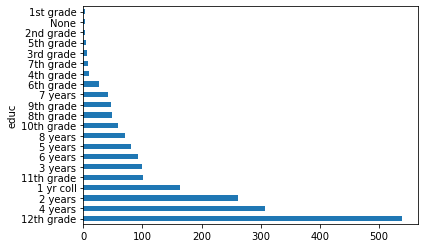

In [6]:
df1.groupby('educ').size().sort_values(ascending=False).plot(kind = 'barh')

<AxesSubplot:ylabel='income06'>

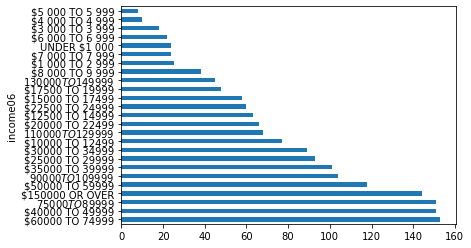

In [7]:
df1.groupby('income06').size().sort_values(ascending=False).plot(kind = 'barh')

<AxesSubplot:ylabel='age'>

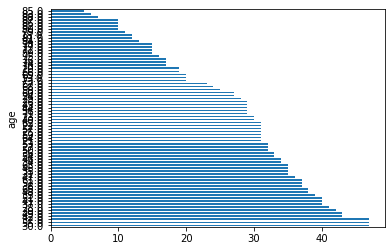

In [10]:
df1.groupby('age').size().sort_values(ascending=False).plot(kind = 'barh')

<AxesSubplot:ylabel='wrkslf'>

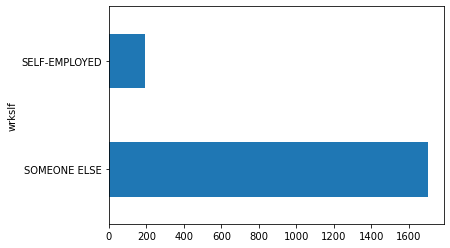

In [9]:
df1.groupby('wrkslf').size().sort_values(ascending=False).plot(kind = 'barh')

Data Pre-processing

Potential issues regarding the data by include missing data,wrong data types, etc. The missing data issue can be addressed by using pd.isna() in order to find what is missing from the dataset. Incorrect data types can be fixed by transforming one data into another (for example transforming int64 for object and vice versa).

In [11]:
df1 = df.rename(columns= {'income06':'income', 'educ':'education_level', 'age': 'respondent_age', 'wrkslf': 'selfemployment_status' })
df1.columns

Index(['year', 'id', 'wrkstat', 'selfemployment_status', 'wrkgvt', 'marital',
       'sibs', 'childs', 'respondent_age', 'education_level',
       ...
       'south', 'divlaw2', 'age.f', 'mslm_spk.high', 'mslm_spk.yes',
       'grass.legal', 'age2', 'relig2', 'dem', 'science_quiz.f'],
      dtype='object', length=221)

In [12]:
def Income(s):
    
    if s == 'UNDER $1 000':
        a = 0
        
    elif s[0] == '$':
        a = ''
        for i in s[1:]:
            if i.lower() < 'a':
                a += i
            else:
                break
        a = int(a.replace(' ', ''))
        
    else:
        print('error')
        print(s)
    return a

In [13]:
df1['inc1'] = df1.income.dropna().apply(Income)

In [14]:
df1.inc1.unique()

array([150000., 110000., 130000.,  50000.,  25000.,  30000.,   5000.,
            0.,   8000.,  22500.,     nan,  40000.,  60000.,  90000.,
        75000.,  35000.,  15000.,  20000.,   6000.,  17500.,  12500.,
        10000.,   1000.,   7000.,   4000.,   3000.])

In [15]:
df1[['income', 'inc1']].head(20)

,income,inc1
0,$150000 OR OVER,150000.0
1,$150000 OR OVER,150000.0
2,$110000 TO $129999,110000.0
3,$130000 TO $149999,130000.0
4,$50000 TO 59999,50000.0
5,$25000 TO 29999,25000.0
6,$30000 TO 34999,30000.0
7,$5 000 TO 5 999,5000.0
8,UNDER $1 000,0.0
9,$30000 TO 34999,30000.0


In [16]:
df.educ.unique()

array(['4 years', '12th grade', '1 yr coll', '7 years', '3 years',
       '11th grade', '9th grade', '5 years', '10th grade', '4th grade',
       'None', '2 years', '6 years', '8 years', '8th grade', '6th grade',
       '5th grade', '7th grade', nan, '3rd grade', '1st grade',
       '2nd grade'], dtype=object)

In [17]:
edu_type = ['8 years',
            '7 years',
            '6 years',
            '5 years',
            '4 years',
            '3 years',
            '2 years',
            '1 yr coll',
            '12th grade',
            '11th grade',
            '10th grade',
            '9th grade',
            '8th grade',
            '7th grade',
            '6th grade',
            '5th grade',
            '4th grade',
            '3rd grade',
            '2nd grade',
            '1st grade',
            'None']

In [18]:
d2 = {key: len(edu_type)-i-1 for i, key in enumerate(edu_type)}

In [19]:
d2

{'8 years': 20,
 '7 years': 19,
 '6 years': 18,
 '5 years': 17,
 '4 years': 16,
 '3 years': 15,
 '2 years': 14,
 '1 yr coll': 13,
 '12th grade': 12,
 '11th grade': 11,
 '10th grade': 10,
 '9th grade': 9,
 '8th grade': 8,
 '7th grade': 7,
 '6th grade': 6,
 '5th grade': 5,
 '4th grade': 4,
 '3rd grade': 3,
 '2nd grade': 2,
 '1st grade': 1,
 'None': 0}

In [20]:
df1['education_level2'] = df1.education_level.map(d2)

In [21]:
df1[['education_level','education_level2']].head(17)

,education_level,education_level2
0,4 years,16.0
1,12th grade,12.0
2,12th grade,12.0
3,1 yr coll,13.0
4,4 years,16.0
5,7 years,19.0
6,3 years,15.0
7,11th grade,11.0
8,9th grade,9.0
9,5 years,17.0


In [22]:
def Degree(x):
    if x >=0:
        if x <= 12:
            return 'High School And Below'
        elif (x>12) & (x<17):
            return 'Some College'
        elif x >= 17:
            return 'College and Beyond'
        else:
            return np.nan

In [23]:
df1['degree'] = df1.education_level2.apply(Degree)

In [24]:
df1[['education_level','education_level2','degree']]

,education_level,education_level2,degree
0,4 years,16.0,Some College
1,12th grade,12.0,High School And Below
2,12th grade,12.0,High School And Below
3,1 yr coll,13.0,Some College
4,4 years,16.0,Some College
...,...,...,...
1969,4 years,16.0,Some College
1970,1 yr coll,13.0,Some College
1971,1 yr coll,13.0,Some College
1972,12th grade,12.0,High School And Below


Methods

I used strip plots to illustrate and visualize the relationship between income and education level. 

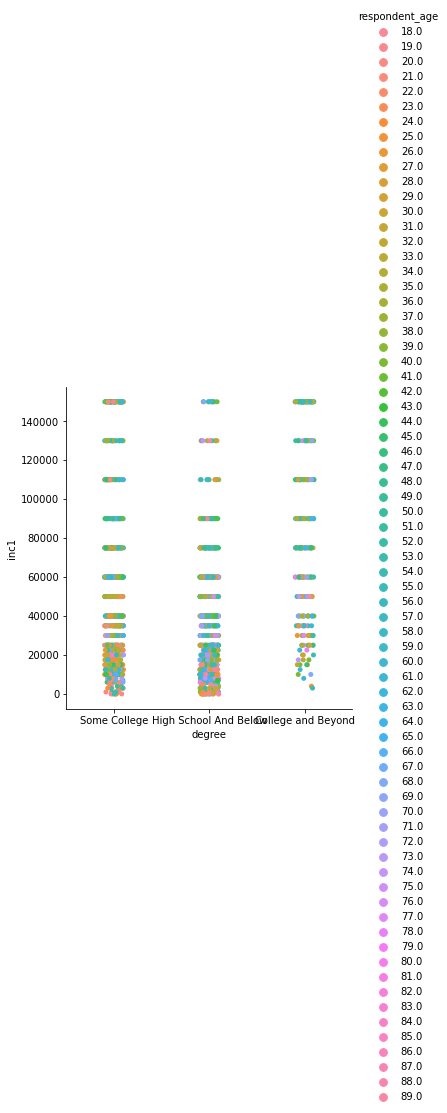

In [39]:
sns.catplot(x="degree", y="inc1", hue='respondent_age',
           data=df1)
fig, ax = plt.subplots(figsize=(10, 6)) 

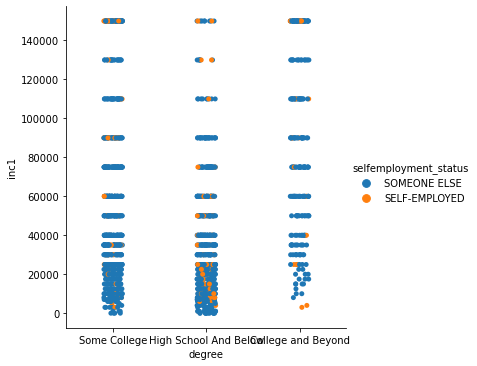

In [34]:
sns.catplot(x="degree", y="inc1", hue='selfemployment_status',
           data=df1)

Results/Findings and Limitations

According to the findings from both graphs, majority of the respondents who either have some college or high school education make less than $20,000 annually. That is not the case for those who have graduated from college, thus proving my hypothesis that income is impacted by one's level of education. As a result, the research question was answered to the fullest extent. One way to improve the analysis in order to make the research more rigorous is to  is to run additional statistical tests.